<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

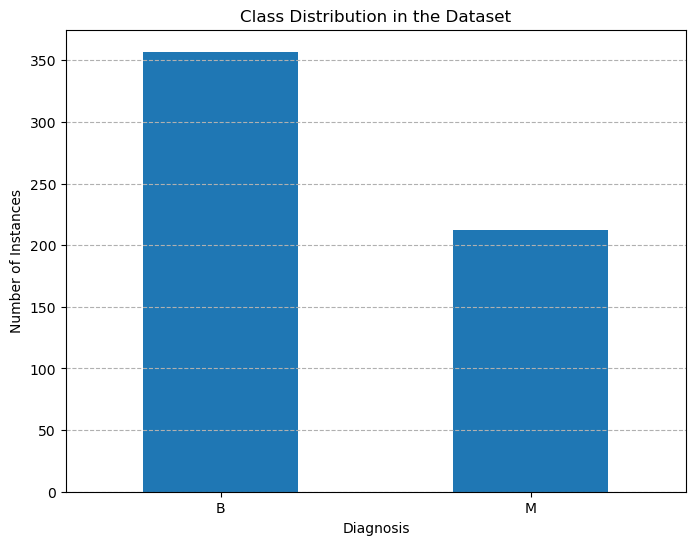

Numerical columns summary:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000       

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path = 'C:/Users/Bhushan/Desktop/Machine Learning/breast_cancer_wisconsin_diagnostic_data.csv'
data = pd.read_csv(file_path)
data.head()
data.tail()
data.info()
data.describe()

# Count the number of instances per class (diagnosis)
class_counts = data['diagnosis'].value_counts()

# Create a bar plot to visualize the class imbalance
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution in the Dataset')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

# Dropping the 'id' column
data.drop('id', axis=1, inplace=True)

# Basic stats for numerical columns
numerical_summary = data.describe()

# Summary for categorical columns (if any)
categorical_summary = data.describe(include=['O'])

print("Numerical columns summary:")
print(numerical_summary)

print("\nCategorical columns summary:")
print(categorical_summary)

# To get the number of unique values in each column
unique_values = data.nunique()

print("\nNumber of unique values in each column:")
print(unique_values)

# Encoding the 'diagnosis' column
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Splitting the dataset into features (X) and the target variable (y)
X = data.drop('diagnosis', axis=1).values
y = data['diagnosis'].values

# Splitting the dataset into Training & Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

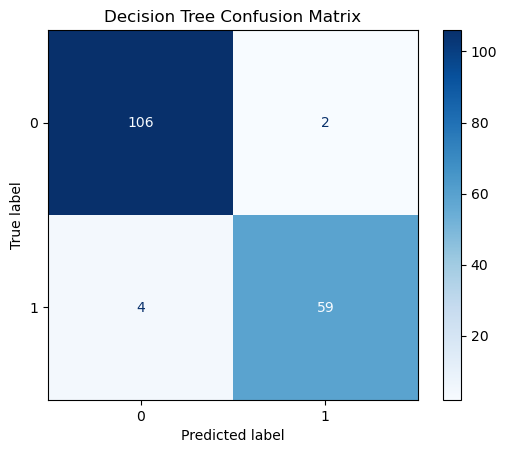

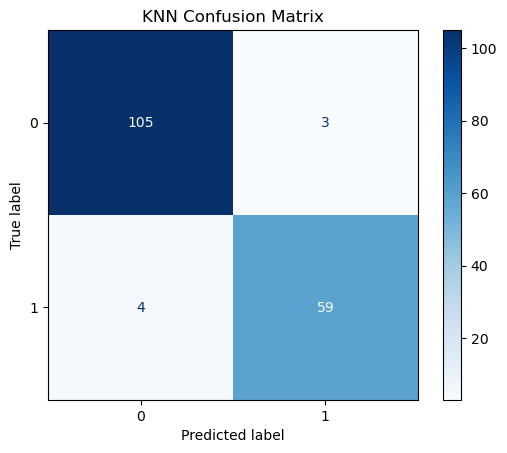

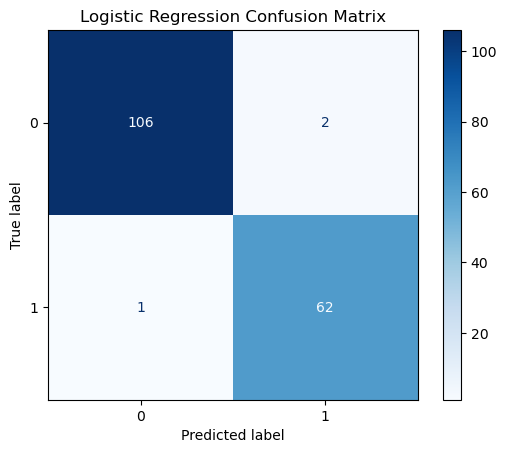

Decision Tree Accuracy: 96.49%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


KNN Accuracy: 95.91%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Logistic Regression Accuracy: 98.25%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# K-Nearest Neighbors (KNN) Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

# Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=42, max_iter=10000)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)

# Confusion Matrix Visualization for Each Classifier
for model_name, y_pred in [('Decision Tree', y_pred_dt), ('KNN', y_pred_knn), ('Logistic Regression', y_pred_lr)]:
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Model Evaluation Reports
for model_name, y_pred in [('Decision Tree', y_pred_dt), ('KNN', y_pred_knn), ('Logistic Regression', y_pred_lr)]:
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}\n")


# Initialize a list to store summary results
results_summary = []



Summary of Model Performances:
                 Model Accuracy         Confusion Matrix
0        Decision Tree   96.49%  [[106   2]\n [  4  59]]
1                  KNN   95.91%  [[105   3]\n [  4  59]]
2  Logistic Regression   98.25%  [[106   2]\n [  1  62]]


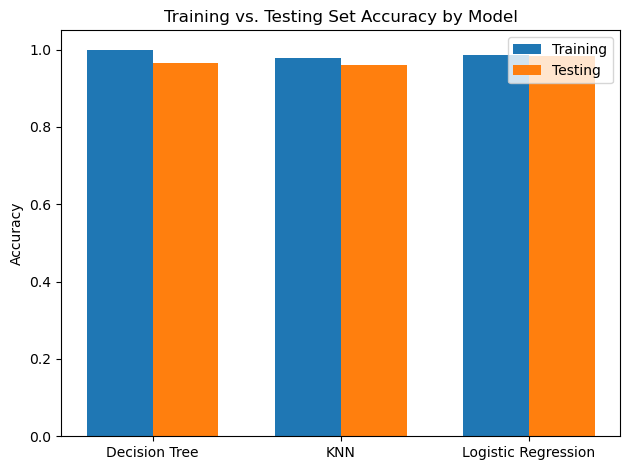

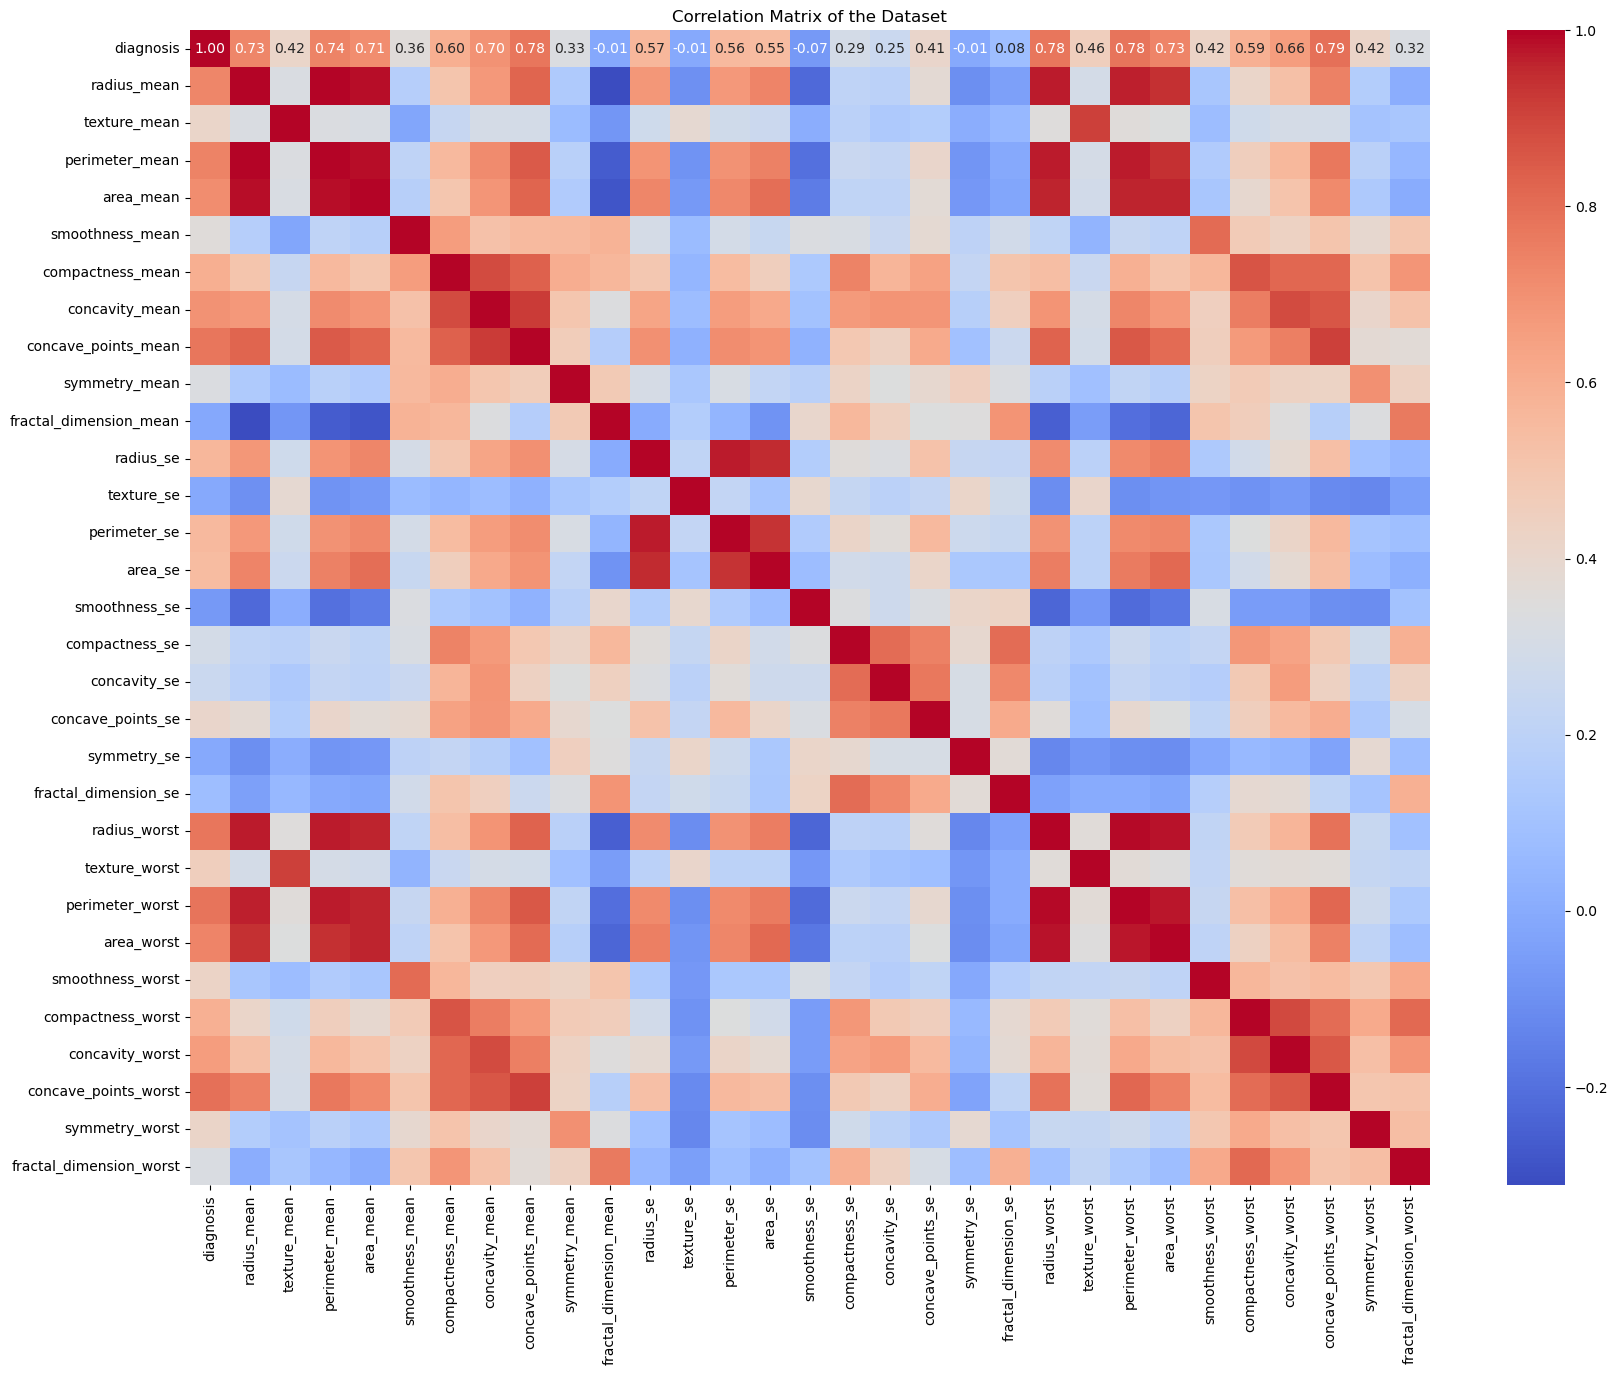

In [14]:

# List of models and their corresponding predictions
model_predictions = {
    'Decision Tree': y_pred_dt,
    'KNN': y_pred_knn,
    'Logistic Regression': y_pred_lr
}

# Evaluate each model and prepare the summary
for name, y_pred in model_predictions.items():
    accuracy = accuracy_score(y_test, y_pred)  # Calculating accuracy
    cm = confusion_matrix(y_test, y_pred)  # Confusion matrix

    # Store the results
    results_summary.append({
        'Model': name,
        'Accuracy': f"{accuracy*100:.2f}%",
        'Confusion Matrix': np.array2string(cm)
    })

# Creating a DataFrame from the results
results_summary_df = pd.DataFrame(results_summary)

# Displaying the summary table
print("Summary of Model Performances:")
print(results_summary_df[['Model', 'Accuracy', 'Confusion Matrix']])

# Calculating accuracies for the training set
y_pred_dt_train = dt_classifier.predict(X_train)
y_pred_knn_train = knn_classifier.predict(X_train)
y_pred_lr_train = lr_classifier.predict(X_train)

accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)

# Calculating accuracies for the testing set
accuracy_dt_test = accuracy_score(y_test, y_pred_dt)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr)

# Visualization of Training and Testing Set Accuracies
models = ['Decision Tree', 'KNN', 'Logistic Regression']
training_accuracies = [accuracy_dt_train, accuracy_knn_train, accuracy_lr_train]
testing_accuracies = [accuracy_dt_test, accuracy_knn_test, accuracy_lr_test]

x = np.arange(len(models))  # the label locations
bar_width = 0.35  # the width of the bars

fig, ax = plt.subplots()
train_rects = ax.bar(x - bar_width/2, training_accuracies, bar_width, label='Training')
test_rects = ax.bar(x + bar_width/2, testing_accuracies, bar_width, label='Testing')

ax.set_ylabel('Accuracy')
ax.set_title('Training vs. Testing Set Accuracy by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()

# calculating the correlation matrix
correlation_matrix = data.corr()

# For visualization, we'll use seaborn for a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of the Dataset')
plt.show()


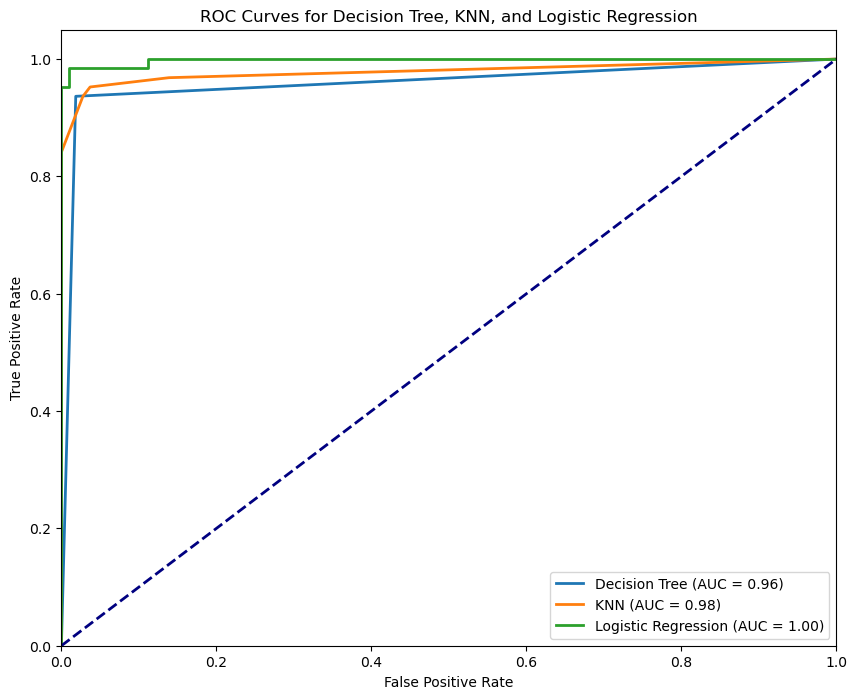

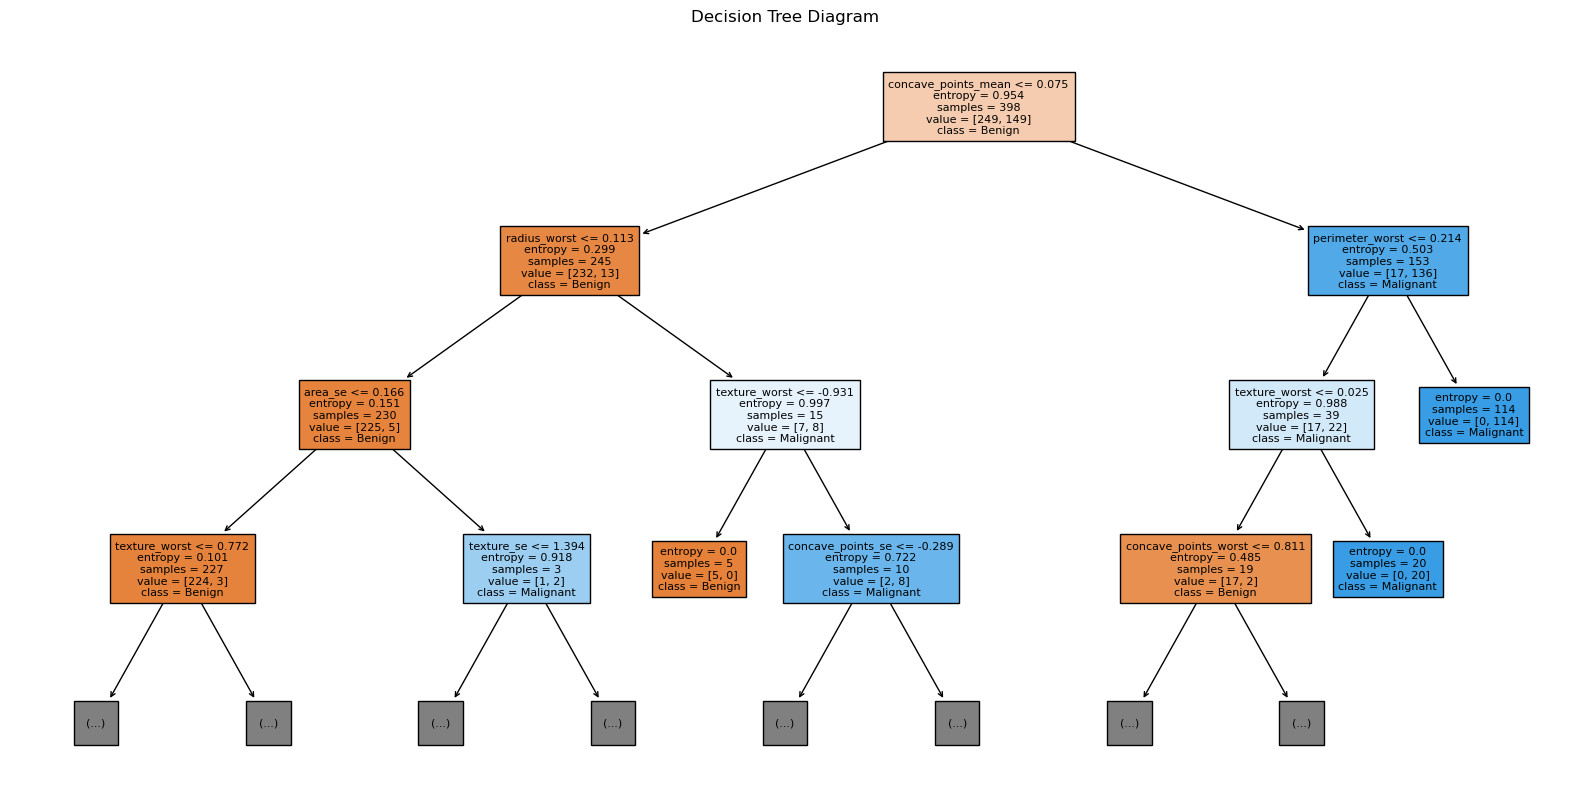

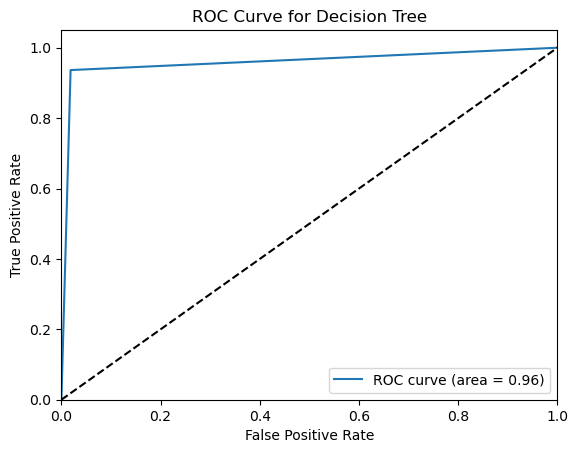

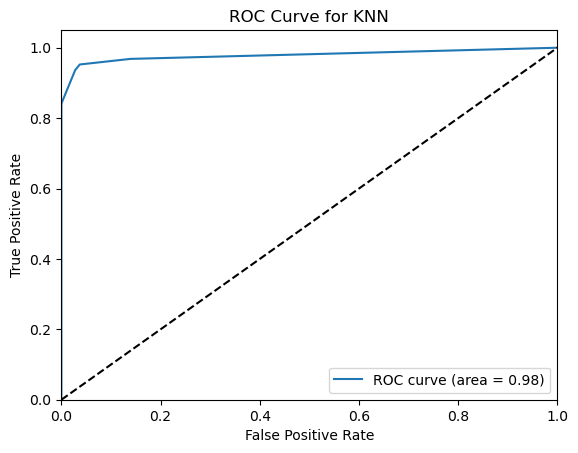

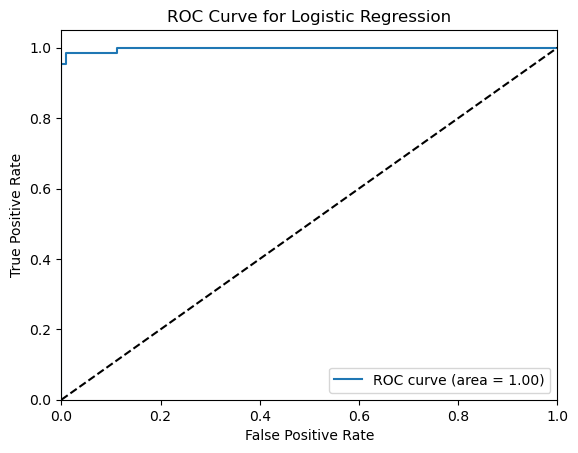

In [15]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay


# Generate and store ROC curve plots

roc_plots = {}
for name, model in [('Decision Tree', dt_classifier), ('KNN', knn_classifier), ('Logistic Regression', lr_classifier)]:
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    roc_plot = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
    roc_plots[name] = roc_plot

roc_plots

# Setting up the plot
plt.figure(figsize=(10, 8))

# Plotting ROC Curves for each model
for name, roc_plot in roc_plots.items():
    plt.plot(roc_plot.fpr, roc_plot.tpr, lw=2, label=f'{name} (AUC = {roc_plot.roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree, KNN, and Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Decision Tree Diagram
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=data.drop('diagnosis', axis=1).columns.tolist(), class_names=['Benign', 'Malignant'], max_depth=3, fontsize=8)
plt.title('Decision Tree Diagram')
plt.show()

# Function to plot ROC Curve
def plot_roc_curve(model, model_name):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC Curve for each model
plot_roc_curve(dt_classifier, "Decision Tree")
plot_roc_curve(knn_classifier, "KNN")
plot_roc_curve(lr_classifier, "Logistic Regression")
